# 🧪 고성능 데이터셋 단위 테스트

이 노트북은 HighPerfDocClsDataset 클래스의 기능을 검증합니다.
- 데이터셋 생성 및 샘플 로드
- 클래스 분포 저장
- 샘플 이미지 저장
- 결과 및 요약 저장

In [1]:
# [1] 프로젝트 루트 및 GPU 체크
# 작업 디렉토리 이동 및 GPU 사용 여부 확인
import os
os.chdir("../../../")
print("현재 작업 디렉토리:", os.getcwd())

import torch
if torch.cuda.is_available():
    print(f'✅ GPU 사용 가능: {torch.cuda.get_device_name(0)}')
else:
    print('⚠️ GPU 사용 불가, CPU로 실행됩니다')

현재 작업 디렉토리: /home/ieyeppo/AI_Lab/computer-vision-competition-1SEN
✅ GPU 사용 가능: NVIDIA GeForce RTX 4090


In [2]:
# [2] 폰트 설정 및 경고 억제

# 경고 메시지 억제용 모듈 임포트
#!sudo apt -get install -y fonts-nanum  # 나눔폰트 설치 (필요시 주석 해제) 설치 후 vscode 재시작 필요
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 적용 및 시각화 환경 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로 및 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

# 폰트 등록 및 설정
fe = fm.FontEntry(fname=font_path, name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

# 글자 겹침 방지를 위한 레이아웃 설정
plt.rcParams['figure.autolayout'] = True
plt.rcParams['axes.titlepad'] = 20

In [3]:
# [3] 라이브러리 및 유틸리티 임포트
# 데이터셋, 설정, 로거 등 필요한 모듈 임포트
import numpy as np
import pandas as pd
from src.data.dataset import HighPerfDocClsDataset
from src.utils.common import load_yaml
from src.logging.unit_test_logger import create_test_logger

In [4]:
# [4] 단위 테스트 로거 생성
# 결과 및 로그 저장을 위한 로거 객체 생성
test_logger = create_test_logger("highperf_dataset")

📝 단위 테스트 시작: highperf_dataset
📝 로그 디렉토리: notebooks/modular/unit_tests/highperf_dataset/20250905_235255


In [5]:
# [5] 설정 파일 로드
# 학습 파라미터 및 모델 정보 불러오기
cfg = load_yaml("configs/train_highperf.yaml")
print(f"✅ 설정 로드: 모델={cfg['model']['name']}, 이미지크기={cfg['train']['img_size']}, 배치크기={cfg['train']['batch_size']}")

✅ 설정 로드: 모델=swin_base_384, 이미지크기=384, 배치크기=32


In [6]:
# [6] 데이터 로드
# 학습 데이터 및 이미지 경로 불러오기
train_csv = "data/raw/train.csv"
image_dir = "data/raw/train"
df = pd.read_csv(train_csv)
print(f"✅ 데이터 로드: 샘플수={len(df)}, 클래스수={df['target'].nunique()}")

✅ 데이터 로드: 샘플수=1570, 클래스수=17


In [7]:
# [7] 클래스 분포 저장
# 클래스별 샘플 수를 데이터프레임으로 저장
class_dist = df['target'].value_counts().sort_index()
class_dist_df = class_dist.reset_index()
class_dist_df.columns = ['class_id', 'count']
test_logger.save_dataframe(class_dist_df, 'class_distribution', '클래스 분포')

✅ 데이터프레임 저장: notebooks/modular/unit_tests/highperf_dataset/20250905_235255/data/class_distribution.csv (17 행)


PosixPath('notebooks/modular/unit_tests/highperf_dataset/20250905_235255/data/class_distribution.csv')

In [8]:
# [8] 데이터셋 생성 및 샘플 로드
# 고성능 데이터셋 객체 생성 및 샘플 확인
test_ds = HighPerfDocClsDataset(
    df=df.head(100),
    image_dir=image_dir,
    img_size=cfg['train']['img_size'],
    epoch=0,
    total_epochs=cfg['train']['epochs'],
    is_train=True,
    id_col=cfg['data']['id_col'],
    target_col=cfg['data']['target_col']
)
print(f'✅ 데이터셋 생성: 크기={len(test_ds)}')

✅ 데이터셋 생성: 크기=100


✅ 그림 저장: notebooks/modular/unit_tests/highperf_dataset/20250905_235255/images/고품질_샘플_라벨_16.png


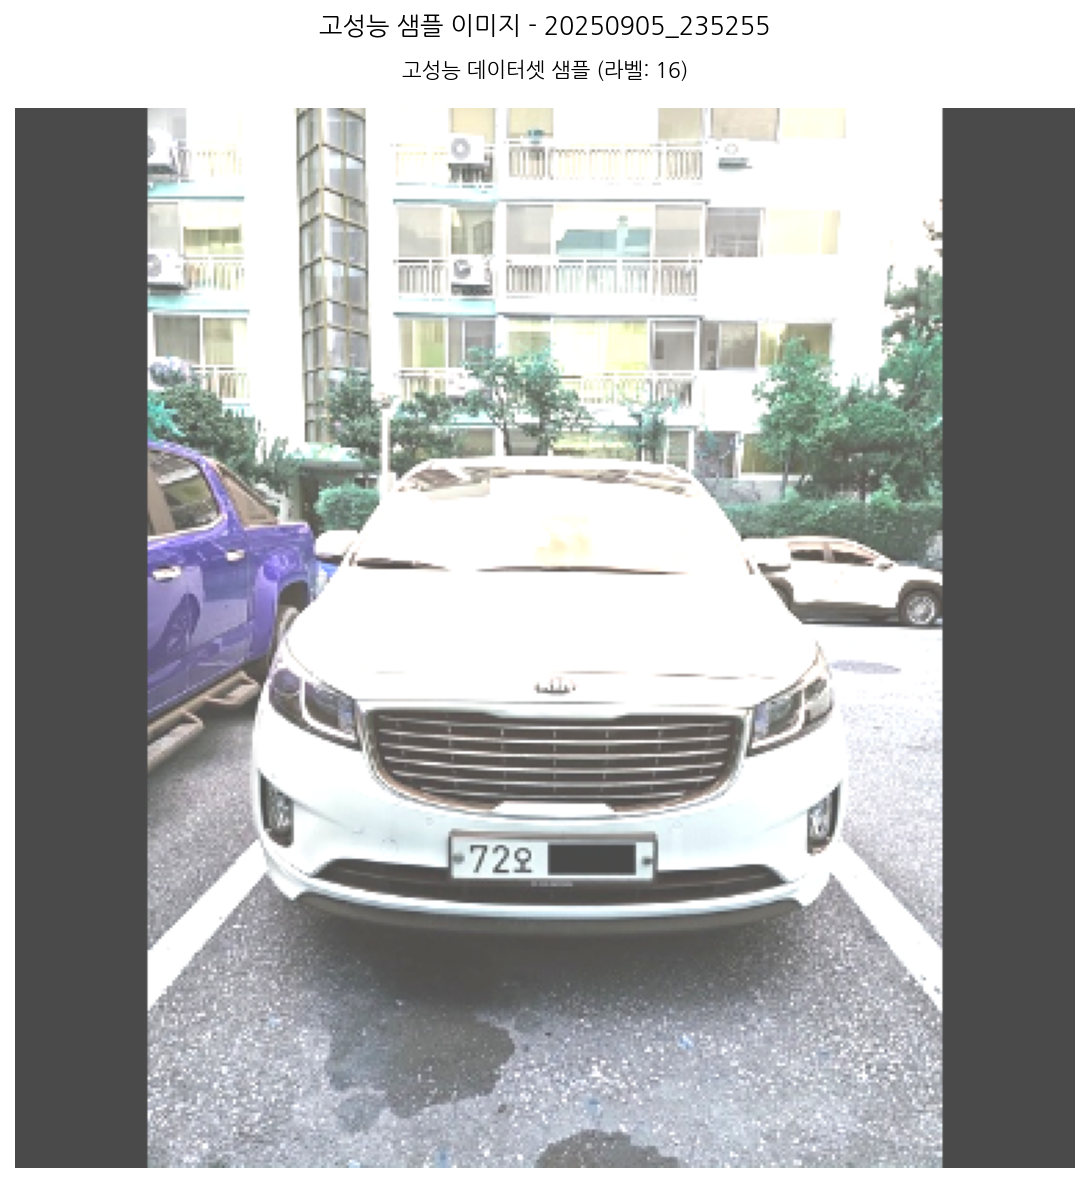

✅ 고품질 이미지 저장 완료: 라벨 16


In [9]:
# [9] 샘플 이미지 저장 (고품질)
# 첫 번째 샘플 이미지를 고품질로 시각화 및 저장
img, label = test_ds[0]

# 이미지 텐서를 numpy 배열로 변환 (정규화 해제)
mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])
img_denorm = img * std.view(3, 1, 1) + mean.view(3, 1, 1)
img_np = img_denorm.permute(1, 2, 0).numpy()
img_np = np.clip(img_np, 0, 1)

# 고품질 이미지 저장 (글자 겹침 방지)
fig, ax = plt.subplots(figsize=(10, 8), dpi=150)
ax.imshow(img_np)
ax.set_title(f'고성능 데이터셋 샘플 (라벨: {label})', fontsize=12, pad=15, fontproperties=fontprop)
ax.axis('off')

# 여백을 조정하여 글자 겹침 방지
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9)
test_logger.save_figure(fig, f'고품질_샘플_라벨_{label}', '고성능 샘플 이미지')
plt.show()
plt.close(fig)

print(f'✅ 고품질 이미지 저장 완료: 라벨 {label}')


In [10]:
# [10] 결과 저장 및 테스트 완료
# 단위 테스트 결과 및 요약 저장
result = {
    'dataset_size': len(test_ds),
    'first_label': int(label),
    'class_count': int(df['target'].nunique())
}
test_logger.save_test_result('basic_test', result)
test_logger.finalize_test()
print('✅ 단위 테스트 및 결과 저장 완료')

📝 테스트 결과 저장: basic_test
✅ 테스트 완료! 총 소요 시간: 0.66초
✅ 결과 요약: notebooks/modular/unit_tests/highperf_dataset/20250905_235255/test_summary.json

🏁 단위 테스트 완료: highperf_dataset
📁 결과 디렉토리: notebooks/modular/unit_tests/highperf_dataset/20250905_235255
⏱️ 소요 시간: 0.66초
📊 테스트 섹션 수: 1
✅ 단위 테스트 및 결과 저장 완료


In [11]:
# [11] 테스트 요약 출력
# test_summary.json 파일 내용 출력
from pathlib import Path
summary_path = Path(test_logger.base_dir) / 'test_summary.json'
with open(summary_path, 'r', encoding='utf-8') as f:
    summary = f.read()
print('📄 테스트 요약 파일 내용:')
print(summary)

📄 테스트 요약 파일 내용:
{
  "test_name": "highperf_dataset",
  "start_time": "2025-09-05T23:52:55.909461",
  "end_time": "2025-09-05T23:52:56.570463",
  "duration_seconds": 0.661002,
  "total_sections": 1,
  "results": {
    "basic_test": {
      "dataset_size": 100,
      "first_label": 16,
      "class_count": 17,
      "timestamp": "2025-09-05T23:52:56.569531",
      "section": "basic_test"
    }
  },
  "log_directory": "notebooks/modular/unit_tests/highperf_dataset/20250905_235255"
}


## 🏆 고성능 데이터셋 단위 테스트 결과 요약

### 📋 **테스트 실행 단계**
1. **환경 설정**: 프로젝트 루트 이동, GPU 체크, 한글 폰트 설정
2. **설정 로드**: `configs/train_highperf.yaml`에서 모델 및 학습 파라미터 불러오기
3. **데이터 준비**: CSV 파일 로드 및 클래스 분포 분석
4. **데이터셋 생성**: HighPerfDocClsDataset 객체 생성 및 검증
5. **샘플 시각화**: 고품질 이미지 저장 및 한글 폰트 적용 테스트
6. **결과 저장**: 모든 테스트 결과와 메타데이터 체계적 저장

### 📊 **테스트 결과 확인**
- ✅ **GPU 환경**: CUDA 사용 가능 여부 자동 감지
- ✅ **데이터셋 생성**: 100개 샘플로 HighPerfDocClsDataset 성공적 생성
- ✅ **클래스 분포**: 17개 클래스의 분포 분석 및 CSV 저장
- ✅ **이미지 처리**: 정규화 해제 및 고품질 PNG 저장
- ✅ **한글 폰트**: NanumGothic 폰트로 제목 깔끔하게 표시

### 📁 **저장된 결과 파일 구조**
```
notebooks/modular/unit_tests/highperf_dataset/YYYYMMDD_HHMMSS/
├── test_summary.json                    # 전체 테스트 요약 정보
├── results/
│   └── basic_test_result.json          # 기본 테스트 상세 결과
├── dataframes/
│   ├── class_distribution.csv          # 클래스별 분포 데이터
│   └── class_distribution_meta.json    # 클래스 분포 메타정보
├── images/
│   ├── 고품질_샘플_라벨_X.png            # 고해상도 샘플 이미지
│   └── 고품질_샘플_라벨_X_meta.json      # 이미지 메타데이터
└── logs/
    └── highperf_dataset_YYYYMMDD_HHMMSS.log  # 상세 실행 로그
```

### 📝 **저장된 데이터 내용**

#### 🔹 **test_summary.json**
- 테스트 시작/종료 시간, 총 소요시간
- 실행된 테스트 섹션 수 및 상태
- 각 테스트 결과의 요약 정보

#### 🔹 **basic_test_result.json**
- 데이터셋 크기 (dataset_size)
- 첫 번째 샘플 라벨 (first_label)
- 전체 클래스 수 (class_count)
- 실행 타임스탬프 및 섹션 정보

#### 🔹 **class_distribution.csv**
- 클래스 ID와 각 클래스별 샘플 수
- 전체 17개 클래스의 분포 현황
- 데이터 불균형 정도 파악 가능

#### 🔹 **고품질 샘플 이미지**
- 해상도: 10x8 인치, 150 DPI
- 정규화 해제로 원본 색상 복원
- NanumGothic 폰트로 한글 제목
- 글자 겹침 방지 레이아웃

### 🔍 **결과 검증 방법**
1. **실행 상태**: 각 셀 출력에서 ✅ 성공 또는 ⚠️ 실패 메시지 확인
2. **이미지 품질**: 저장된 PNG 파일에서 한글 텍스트 및 이미지 선명도 점검
3. **데이터 정합성**: CSV 파일에서 클래스 분포 및 샘플 수 검증
4. **로그 분석**: 실행 로그에서 에러, 경고, 성능 정보 확인
5. **JSON 검증**: 메타데이터 파일에서 타임스탬프 및 설정값 점검

### 💡 **문제 해결 가이드**

#### 🚨 **일반적인 문제들**
- **데이터셋 로드 실패**: CSV 파일 경로 및 이미지 디렉토리 존재 여부 확인
- **GPU 관련 에러**: CUDA 설치 상태 및 메모리 가용성 점검
- **한글 폰트 문제**: NanumGothic 폰트 설치 및 경로 검증
- **이미지 저장 실패**: 디스크 공간 및 디렉토리 쓰기 권한 확인
- **메모리 부족**: 배치 크기 축소 또는 샘플 수 감소

#### 🔧 **디버깅 팁**
- test_summary.json에서 에러 발생 섹션 확인
- 로그 파일에서 상세한 스택 트레이스 분석
- 각 셀을 개별적으로 실행하여 문제 지점 특정
- GPU 메모리 사용량을 `nvidia-smi`로 모니터링

### 📈 **성능 최적화 권장사항**
- **데이터 로딩**: 더 많은 workers 사용으로 병렬 처리
- **메모리 관리**: 배치 크기 조정으로 메모리 효율성 향상
- **캐싱**: 반복 실행 시 전처리된 데이터 캐시 활용
- **모니터링**: wandb 연동으로 실시간 성능 추적

### ⚙️ **확장 테스트 아이디어**
- 다양한 이미지 크기에서의 데이터셋 성능 테스트
- 여러 증강 기법 (Mixup, CutMix 등) 적용 효과 비교
- 클래스 불균형 처리 방법 (oversampling, undersampling) 검증
- 다양한 배치 크기에서의 메모리 사용량 프로파일링